In [2]:
from radius import *
# Enable interactive mode
#%matplotlib widget

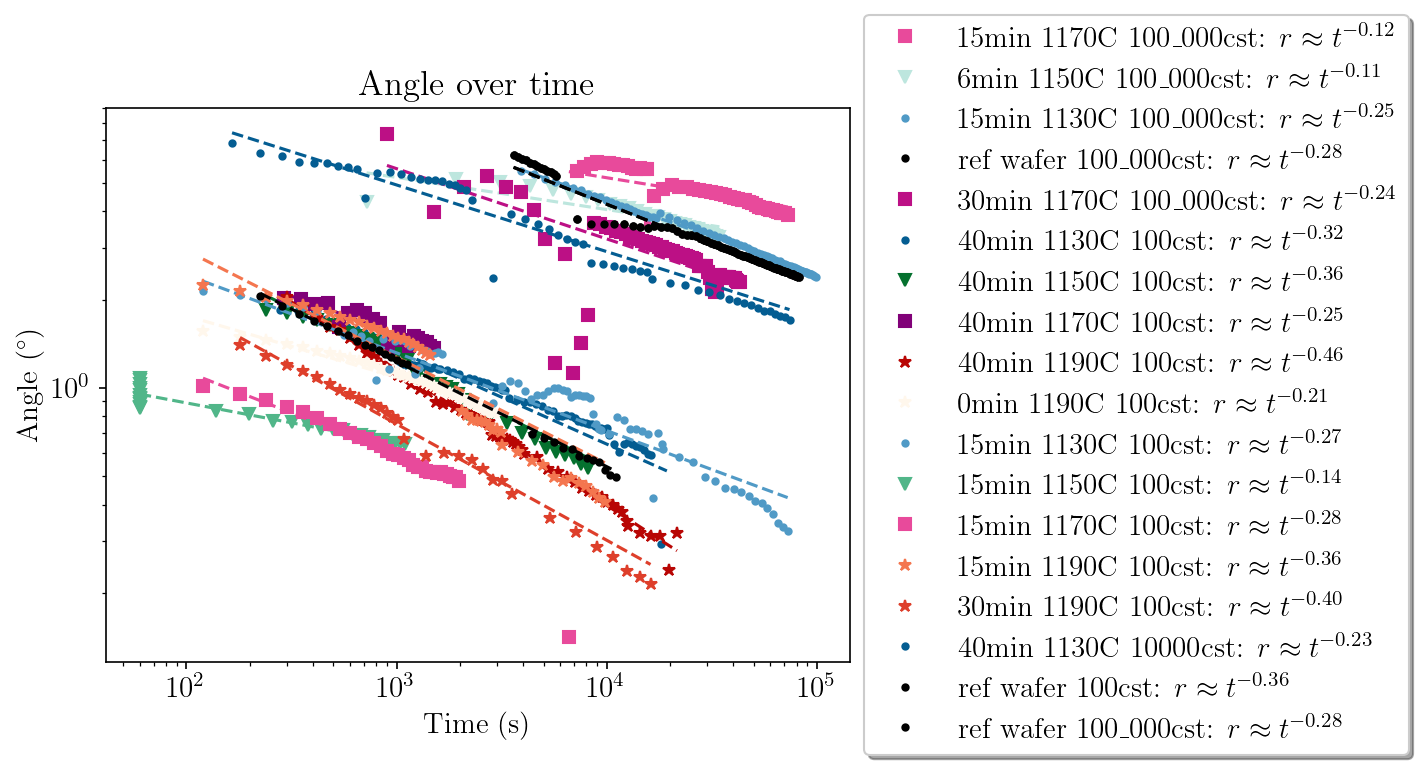

In [9]:
plt.figure(dpi=150)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
})

mark = {
    "100_000cst": '.',
    "100cst": "x",
    "10000cst": "o"
}
marks = {'1130C': ".", '1150C': "v", '1170C': "s", '1190C': "*", "wafer": '.'}
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
colors = {}
for i, t in enumerate(reversed(temps)):
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)
    for j, k in enumerate(times):
        exp = f'{k} {t}'
        color = cmap(1 - j / (num_lines - 1))
        colors[exp] = color
colors['ref wafer'] = 'black'
def plot_angle(path, r_ini, t_ini, region_switch=False, image_switch=False,mini=[False], m=0, n=-1  ):
    average, x_dist, dt, delay = timelapse(path, region_switch, image_switch)
    r, t, dh, dx, da = radius_time(x_dist[m:n], average[m:n], dt, delay[m:n], r_ini=r_ini, t_ini=t_ini, mini=mini)
    a = []
    for i in range(len(t)):
        for dda in da[i]:
            a.append(np.mean(dda[:-1]))
    da_fit, t_fit, popt = power_law_fit(np.nan_to_num(a),t, a=-0.3)
    col = ' '.join(path.split(' ')[3:5]).split('/')[0]
    visc = ' '.join(path.split(' ')[5:6]).split('/')[0]

    t_tot = [item for sublist in t for item in sublist]
    exp = ' '.join(path.split(' ')[3:6]).split('/')[0]
    filename = f"data_angle/{exp}.csv"
    df = pd.DataFrame({'Angle': np.nan_to_num(a), 'Time': t_tot})
    df.to_csv(filename, index=False)

    if True:
        exp = ' '.join(path.split(' ')[3:6]).split('/')[0]
        plt.plot(t_fit, a, marker=marks[filename.split(' ')[1].split('.csv')[0]], c=colors[col], linestyle='None', label=fr'{exp}: $r \approx t^{{{popt[0]:.2f}}}$')      
        plt.plot(t_fit, da_fit, '--', c=colors[col])
    else:
        exp = ' '.join(path.split(' ')[3:6]).split('/')[0]
        print('Error: can\'t calculate angle', exp)

plot_angle('24-06-10 silicon oil 15min 1170C 100_000cst', r_ini=755, t_ini=60*110)

#plot_angle('24-06-17 silicon oil 15min 1150C 100_000cst', r_ini=312, t_ini=15*60)

plot_angle('24-06-20 silicon oil 6min 1150C 100_000cst', r_ini=-120, t_ini=60*12, m=1, n=2)

plot_angle('24-06-13 silicon oil 15min 1130C 100_000cst/Position 3', r_ini=-25, t_ini=60*65)

plot_angle('24-06-06 silicon oil ref wafer 100_000cst', r_ini=250, t_ini=3600)

plot_angle('24-06-24 silicone oil 30min 1170C 100_000cst', r_ini=-56, t_ini=60*15, m=1, n=2)

plot_angle('24-07-15 silicone oil 40min 1130C 100cst', r_ini=1150, t_ini=4*60+40)

plot_angle('24-07-16 silicone oil 40min 1150C 100cst', r_ini=1300, t_ini=4*60, region_switch=True, image_switch=True)

plot_angle('24-07-17 silicone oil 40min 1170C 100cst', r_ini=2319, t_ini=4*60+50)

plot_angle('24-07-18 silicone oil 40min 1190C 100cst', r_ini=649, t_ini=5*60, region_switch=True, image_switch=True)

plot_angle('24-07-09 silicone oil 0min 1190C 100cst', r_ini=680, t_ini=2*60)

plot_angle('24-07-29 silicone oil 15min 1130C 100cst', r_ini=1560, t_ini=60*2)

plot_angle('24-08-01 silicone oil 15min 1150C 100cst', r_ini=225, t_ini=60*1)

plot_angle('24-08-02 silicone oil 15min 1170C 100cst', r_ini=274, t_ini=60*2)

plot_angle('24-08-05 silicone oil 15min 1190C 100cst', r_ini=806, t_ini=60*2)

plot_angle('24-08-07 silicone oil 30min 1190C 100cst', r_ini=321, t_ini=60*3)

plot_angle('24-09-16 silicone oil 40min 1130C 10000cst', r_ini=871, t_ini=60*2 + 45)

plot_angle('24-09-13 silicone oil ref wafer 100cst', r_ini=513, t_ini=60*3 + 45)

plot_angle('24-06-06 silicon oil ref wafer 100_000cst', r_ini=460, t_ini=3600)
###
###
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel(r'Angle ($^{\circ}$)')
plt.title('Angle over time')
plt.savefig('figures/angle.pdf', dpi=200)
plt.show()

c:\Users\ad279661\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ad279661\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\ad279661\AppData\Local\Temp\ipykernel_15048\1677753841.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={'size': 6})


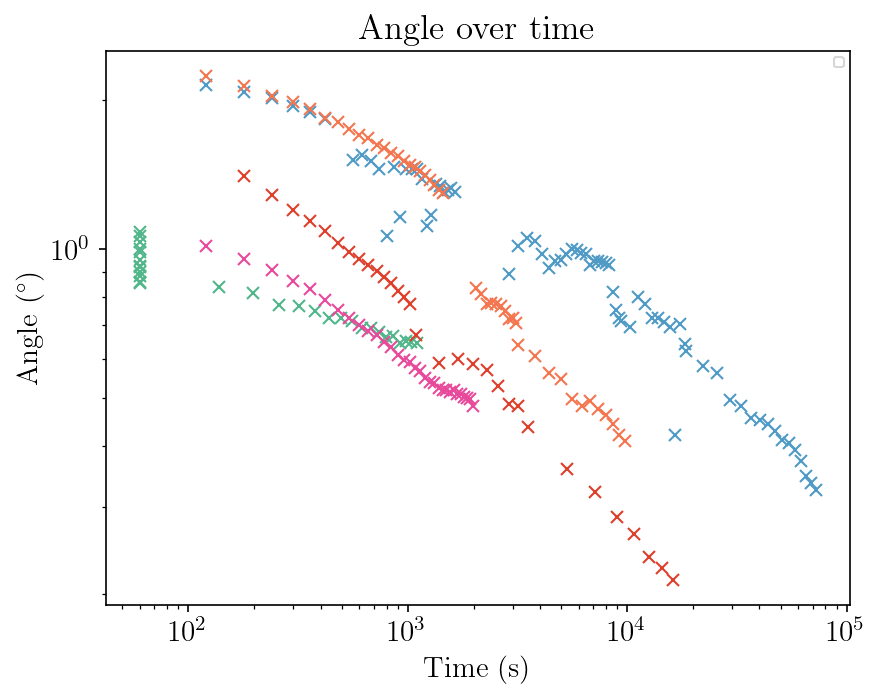

In [7]:
plt.figure(dpi=150)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
})

mark = {
    "100_000cst": '.',
    "100cst": "x"
}
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
colors = {}
for i, t in enumerate(reversed(temps)):
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)
    for j, k in enumerate(times):
        exp = f'{k} {t}'
        color = cmap(1 - j / (num_lines - 1))
        colors[exp] = color
colors['ref wafer'] = 'black'
def plot_angle(path, r_ini, t_ini, region_switch=False, image_switch=False,mini=[False], m=0, n=-1  ):
    average, x_dist, dt, delay = timelapse(path, region_switch, image_switch)
    r, t, dh, dx, da = radius_time(x_dist[m:n], average[m:n], dt, delay[m:n], r_ini=r_ini, t_ini=t_ini, mini=mini)
    a = []
    for i in range(len(t)):
        for dda in da[i]:
            a.append(np.mean(dda[:-1]))
    col = ' '.join(path.split(' ')[3:5]).split('/')[0]
    visc = ' '.join(path.split(' ')[5:6]).split('/')[0]

    t_tot = [item for sublist in t for item in sublist]
    exp = ' '.join(path.split(' ')[3:6]).split('/')[0]
    filename = f"data_angle/{exp}.csv"
    df = pd.DataFrame({'Angle': np.nan_to_num(a), 'Time': t_tot})
    df.to_csv(filename, index=False)

    if True:
        exp = ' '.join(path.split(' ')[3:6]).split('/')[0]
        plt.plot(t_tot, a, marker=mark[visc], c=colors[col], linestyle='None')      
    else:
        exp = ' '.join(path.split(' ')[3:6]).split('/')[0]
        print('Error: can\'t calculate angle', exp)

plot_angle('24-07-29 silicone oil 15min 1130C 100cst', r_ini=1560, t_ini=60*2)

plot_angle('24-08-01 silicone oil 15min 1150C 100cst', r_ini=225, t_ini=60*1)

plot_angle('24-08-02 silicone oil 15min 1170C 100cst', r_ini=274, t_ini=60*2)

plot_angle('24-08-05 silicone oil 15min 1190C 100cst', r_ini=806, t_ini=60*2)

plot_angle('24-08-07 silicone oil 30min 1190C 100cst', r_ini=321, t_ini=60*3)
plt.legend(prop={'size': 6})
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel(r'Angle ($^{\circ}$)')
plt.title('Angle over time')
plt.show()

0min 1190C 100cst
100cst
15min 1130C 100cst
100cst
15min 1130C 100_000cst
100_000cst
15min 1150C 100cst
100cst
15min 1170C 100cst
100cst
15min 1170C 100_000cst
100_000cst
15min 1190C 100cst
100cst
30min 1170C 100_000cst
100_000cst
30min 1190C 100cst
100cst
40min 1130C 10000cst
10000cst
40min 1130C 100cst
100cst
40min 1150C 100cst
100cst
40min 1170C 100cst
100cst
40min 1190C 100cst
100cst
6min 1150C 100_000cst
100_000cst
ref wafer 100cst
100cst
An error occurred: 'wafer'
ref wafer 100_000cst
100_000cst
An error occurred: 'wafer'


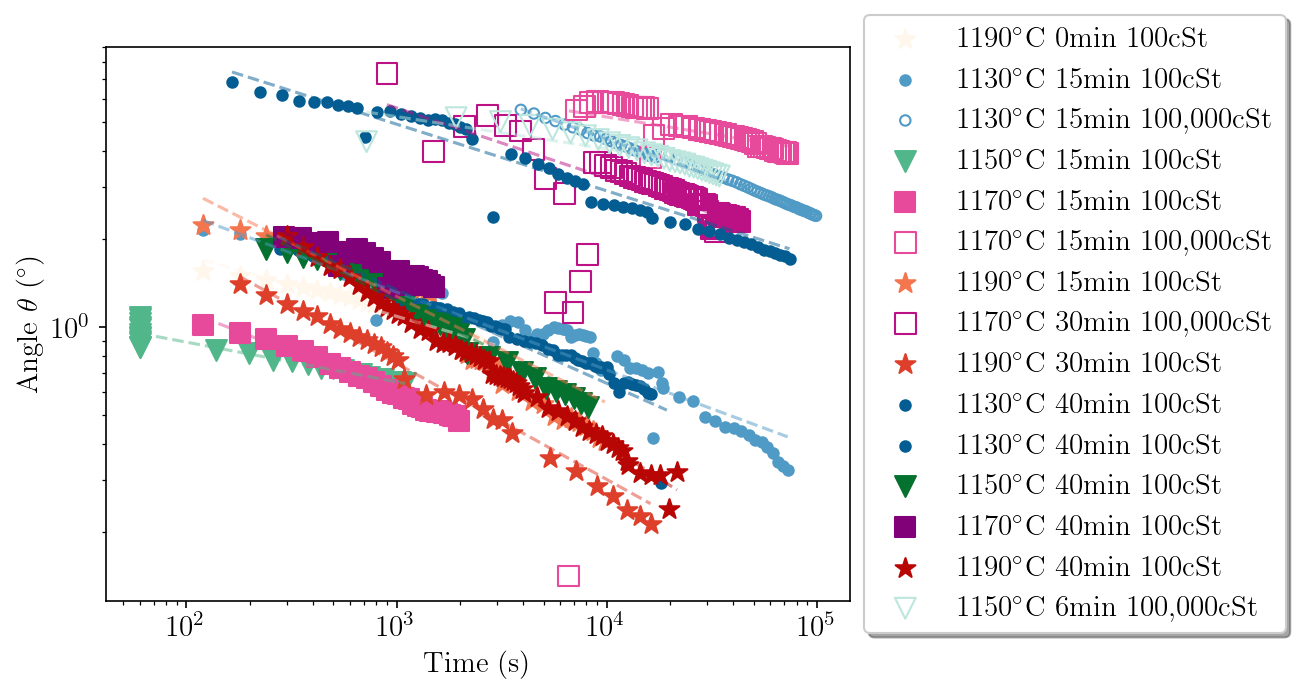

{'T1190C_t0min': -0.20906153200477615, 'T1130C_t15min': -0.2522532883484844, 'T1150C_t15min': -0.13560277554926628, 'T1170C_t15min': -0.11588343985699992, 'T1190C_t15min': -0.3634490680730143, 'T1170C_t30min': -0.23967815473620735, 'T1190C_t30min': -0.3964081847365903, 'T1130C_t40min': -0.3198181996466096, 'T1150C_t40min': -0.3615305171726647, 'T1170C_t40min': -0.25251964725646203, 'T1190C_t40min': -0.4627973780484112, 'T1150C_t6min': -0.10970271095905079, 'Twafer_tref': -0.28428887015942794}


In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
})
path = 'data_angle/'
edge = {
    "100_000cst": 'black',
    "100cst": None,
    "wafer": None
}
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']
marks = {'1130C': ".", '1150C': "v", '1170C': "s", '1190C': "*"}
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
colors = {}
for i, t in enumerate(reversed(temps)):
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)
    for j, k in enumerate(times):
        exp = f'{k} {t}'
        color = cmap(1 - j / (num_lines - 1))
        colors[exp] = color
colors['ref wafer'] = 'black'
def power_law(t, a, a0):
        return a0 * (t ** a)
def power_law_fit(r,t, a=0.1, a0=100):
    '''
    Calculate a fit of the radius over time
    
    r (lists, float): radius data of timelapses
    t (lists, float): times data of timelapses

    return: r_fit (lists, float): all the radius in one single list
            t_fit (lists, float): all the times in one single list
            popt (float): fitted power indice
    '''

    popt, pcov = curve_fit(power_law, t, r, p0 = (a, a0), maxfev=1000000)
    r_fitted = power_law(t, *popt)
    return r_fitted, t, popt

plt.figure(dpi=150)
theta = {}
for file in os.listdir(path):
    try:
        df = pd.read_csv(path + file)
        #dr = pd.read_csv('data/' + file)
        #r = []
        a = df['Angle']
        t = df['Time']
        #for i, dt in enumerate(t):
        #    try:
        #        selected_time = dt 
        #        radius_value = dr.loc[dr['Time'] == selected_time, 'Radius'].values[0]
        #        position = dr.loc[dr['Time'] == selected_time].index[0]
        #        r.append(dr['Radius'][position])
        #    except: None
        exp = file.split('.csv')[0]
        col = ' '.join(file.split(' ')[0:2])
        T = file.split(' ')[1]
        k = file.split(' ')[0]
        name = f'T{T}_t{k}'
        r_fit, t_fit, popt = power_law_fit(a,t, a=-1, a0=100)
        theta[f'{name}'] = popt[0]
        print(exp)
        exp_name = fr'{T.split('C')[0]}$^\circ$C {k} 100cSt'
        face = colors[col]
        if file.split(' ')[-1].split('.csv')[0] == '100_000cst':
            exp_name = fr'{T.split('C')[0]}$^\circ$C {k} 100,000cSt'
            face = 'none'
        print(file.split(' ')[-1].split('.csv')[0])
        if k == 'ref':
            exp_name = 'ref wafer 100,00cSt'
            face = 'none'
        #
        plt.scatter(t, a, label = fr"{exp_name}",
                marker=marks[file.split(' ')[1].split('.csv')[0]], facecolors=face, edgecolors=colors[col], linewidths=1, s=100)
        plt.plot(t_fit, r_fit, '--', c=colors[col], alpha=0.5)
        plt.plot(0,0)
    except FileNotFoundError:
        print(f"Error: File '{file}' not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file}' is empty.")
    except Exception as e:
        print(f"An error occurred: {e}")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.xlabel('Time (s)')
plt.ylabel(r'Angle $\theta$ ($^\circ$)')
#plt.title('Radius of the droplets over time')
plt.xscale('log')
plt.yscale('log')
#plt.savefig('figures/angle.pdf', dpi=200, bbox_inches='tight')
plt.show()
print(theta)

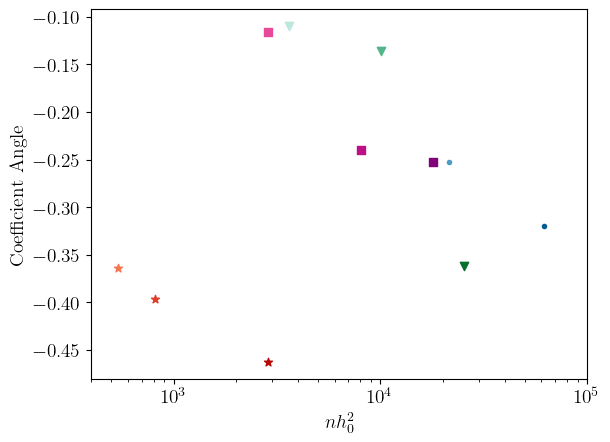

In [8]:
density = np.load('density_dict.npy',allow_pickle='TRUE').item()
height = np.load('height_dict.npy',allow_pickle='TRUE').item()
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
colors = {}
for i, t in enumerate(reversed(temps)):
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)
    for j, k in enumerate(times):
        exp = f'T{t}_t{k}'
        color = cmap(1 - j / (num_lines - 1))
        colors[exp] = color
colors['ref wafer'] = 'black'
edge = {
    "100_000cst": 'black',
    "100cst": None
}

marks = {'T1130C': ".", 'T1150C': "v", 'T1170C': "s", 'T1190C': "*", "wafer": '.'}
col = {'T1130C': "blue", 'T1150C': "green", 'T1170C': "violet", 'T1190C': "red", "wafer": '.'}

plt.figure()
for exp in theta.keys():
    try: 
        plt.scatter(density[exp]*(height[exp]**2), theta[exp], color=colors[exp], marker=marks[exp.split('_')[0]])
    except:None
plt.xscale('log')
plt.xlim([4e2, 1e5])
plt.xlabel(r'$n h_{0}^{2}$')
plt.ylabel(r'Coefficient Angle')
#plt.savefig('figures/angle_density_height.pdf', dpi=200)
plt.show()